# RESEARCH QUESTIONS

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, chi2_contingency

# Set True to downloaded and unzip the dataset
download_dataset = False

if download_dataset:
    !kaggle datasets download najzeko/steam-reviews-2021
    !unzip steam-reviews-2021.zip

## [RQ1] EDA

In [4]:
# Import the dataset in chunks to prevent RAM overusage
chunksize = 10**6  # 1 million rows at a time
chunk_list = []  # List to hold the processed chunks

# Let's set the type for the columns, as by default Pandas uses the most aggressive on the RAM (e.g. int64)
# The types has been chosen after a test on the range of the values, to prevent a loss of information
dtype_spec = {
    'app_id': 'uint32',
    'app_name': 'object',
    'review_id': 'uint32',
    'language': 'object',
    'review': 'object',
    'timestamp_created': 'uint32',
    'timestamp_updated': 'uint32',
    'recommended': 'bool',
    'votes_helpful': 'int64',   # to clip
    'votes_funny': 'int64', # to clip
    'weighted_vote_score': 'float32',
    'comment_count': 'uint16',
    'steam_purchase': 'bool',
    'received_for_free': 'bool',
    'written_during_early_access': 'bool',
    'author.steamid': 'int64',
    'author.num_games_owned': 'int64',  # to clip
    'author.num_reviews': 'int64',  # to clip
    'author.playtime_forever': 'float32',
    'author.playtime_last_two_weeks': 'float32',
    'author.playtime_at_review': 'float32',
    'author.last_played': 'float32'
}

for chunk in pd.read_csv("steam_reviews.csv", chunksize=chunksize, index_col=0, dtype = dtype_spec):
    chunk_list.append(chunk)  # Append each chunk to a list

# All chunks into one dfframe
df = pd.concat(chunk_list)

In [5]:
print(df)

          app_id                  app_name  review_id  language  \
0         292030  The Witcher 3: Wild Hunt   85185598  schinese   
1         292030  The Witcher 3: Wild Hunt   85185250  schinese   
2         292030  The Witcher 3: Wild Hunt   85185111  schinese   
3         292030  The Witcher 3: Wild Hunt   85184605   english   
4         292030  The Witcher 3: Wild Hunt   85184287  schinese   
...          ...                       ...        ...       ...   
21747371  546560           Half-Life: Alyx   65645125   english   
21747372  546560           Half-Life: Alyx   65645115   english   
21747373  546560           Half-Life: Alyx   65645100   english   
21747374  546560           Half-Life: Alyx   65645066   english   
21747375  546560           Half-Life: Alyx   65644930  schinese   

                                                     review  \
0                                   不玩此生遗憾，RPG游戏里的天花板，太吸引人了   
1                                        拔DIAO无情打桩机--杰洛特!!!   
2     

### df Structure and Summary

In [6]:
#Show the first 5 raws of the dataset
df.head(5)

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


In [7]:
# Show the last 5 raws dataset
df.tail(5)

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
21747371,546560,Half-Life: Alyx,65645125,english,Holy balls,1584986704,1584986704,True,0,0,...,True,False,False,76561197967033932,431,7,432.0,0.0,29.0,1.586628e+09
21747372,546560,Half-Life: Alyx,65645115,english,"A tripod thing bears down on you, it looks imm...",1584986693,1584986693,True,0,0,...,False,False,False,76561198046495482,70,10,3296.0,15.0,24.0,1.611080e+09
21747373,546560,Half-Life: Alyx,65645100,english,Honestly this is the best vr game ever,1584986673,1584986673,True,0,0,...,True,False,False,76561198176379749,79,17,2654.0,0.0,34.0,1.591634e+09
21747374,546560,Half-Life: Alyx,65645066,english,Smooth turning is not working right now.\nIt a...,1584986631,1586382422,True,0,0,...,True,False,False,76561198041763187,140,3,210.0,0.0,12.0,1.589715e+09
21747375,546560,Half-Life: Alyx,65644930,schinese,WMR加载中闪退，无法进入游戏\nWMR Flashback in Load，cant pl...,1584986505,1592060800,True,0,0,...,True,False,False,76561198116747069,253,7,1062.0,0.0,8.0,1.602858e+09


In [8]:
# Some information about the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21747371 entries, 0 to 21747375
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   app_id                          uint32 
 1   app_name                        object 
 2   review_id                       uint32 
 3   language                        object 
 4   review                          object 
 5   timestamp_created               uint32 
 6   timestamp_updated               uint32 
 7   recommended                     bool   
 8   votes_helpful                   int64  
 9   votes_funny                     int64  
 10  weighted_vote_score             float32
 11  comment_count                   uint16 
 12  steam_purchase                  bool   
 13  received_for_free               bool   
 14  written_during_early_access     bool   
 15  author.steamid                  int64  
 16  author.num_games_owned          int64  
 17  author.num_reviews            

In [9]:
# Name of each columns
df.columns

Index(['app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

In [10]:
df[["timestamp_created","votes_helpful","votes_funny","weighted_vote_score",
  "comment_count","author.num_games_owned","author.num_reviews","author.playtime_forever",
  "author.playtime_last_two_weeks","author.playtime_at_review","author.last_played"]].describe()

,timestamp_created,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.172169e+07,2.174737e+07
mean,1.544432e+09,4.044689e+05,1.267917e+05,1.654423e-01,1.308768e-01,1.011300e+06,4.044775e+05,1.609104e+04,1.555424e+02,8.807435e+03,1.580506e+09
std,5.812194e+07,1.333741e+09,2.333553e+07,2.237513e-01,2.199398e+00,2.108829e+09,1.333741e+09,3.592179e+04,7.155536e+02,2.309088e+04,8.530538e+07
min,1.290198e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.510223e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01,2.000000e+00,1.250000e+03,0.000000e+00,5.590000e+02,1.573330e+09
50%,1.562446e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.100000e+01,4.000000e+00,4.307000e+03,0.000000e+00,1.881000e+03,1.599058e+09
75%,1.589696e+09,1.000000e+00,0.000000e+00,4.827586e-01,0.000000e+00,1.450000e+02,1.000000e+01,1.491200e+04,0.000000e+00,6.823000e+03,1.609002e+09
max,1.611426e+09,4.398047e+12,4.294967e+09,9.959868e-01,4.893000e+03,4.398047e+12,4.398047e+12,3.744943e+06,2.703900e+04,3.228103e+06,1.611434e+09


### Basic EDA Report:
Our dataset has 22 columns and 21.747.371 rows. From the 22 columns, 4 are boolean, 5 are float, 10 are integer and 3 are string.
The dataset contains the following key entities: App, User, and Review IDs.
* For each **Game**, dimensions include the game’s name and whether it was obtained for free.
* For each **User**, dimensions cover profile statistics, such as the number of games owned, playtime details, and review activity metrics.
* For each **Review**, dimensions include language, timestamp of the review, and voting details, like helpful and funny votes.

### Missing and Duplicated Values

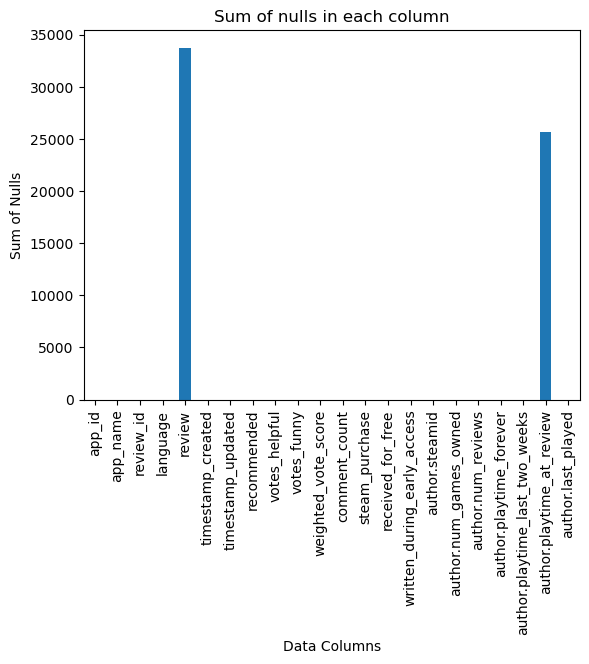

In [11]:
# Find missing values
df.isna().sum().plot(kind="bar",
                    xlabel='Data Columns', ylabel = 'Sum of Nulls',
                     title= 'Sum of nulls in each column')
plt.show()

In [12]:
# Find the duplicates and drop them so the dataset is more clean
df = df.drop_duplicates().reset_index(drop = True).copy()

In [13]:
# Shape of the clean dataset
df.shape

(21612444, 22)

### Univariate Analysis

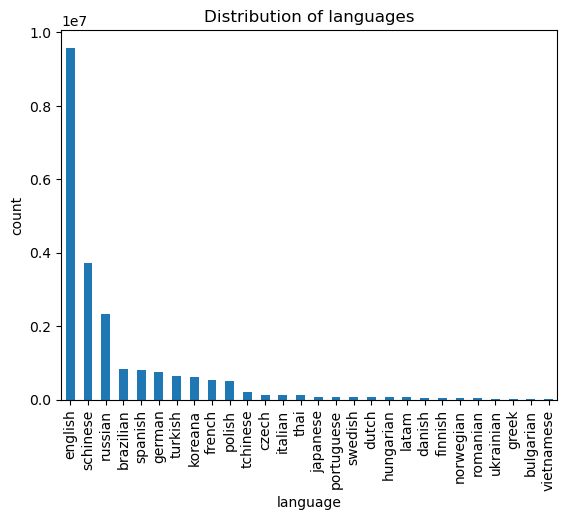

The top 5 most used languages are:  language
english      9580668
schinese     3729039
russian      2340950
brazilian     826897
spanish       804361
Name: count, dtype: int64


In [14]:
df["language"].value_counts().plot(kind="bar", title="Distribution of languages").set_ylabel("count")
plt.show()
print("The top 5 most used languages are: ",df["language"].value_counts().head(5))

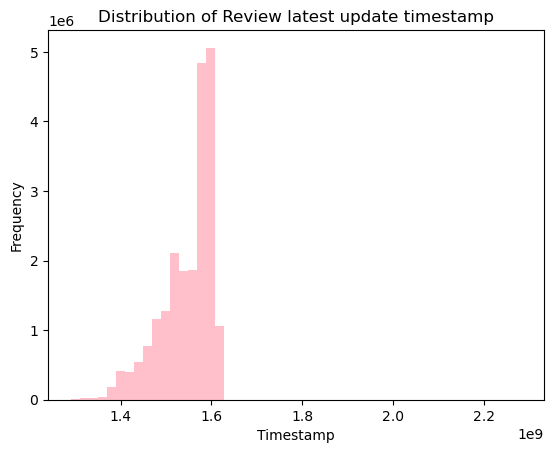

In [15]:
df["timestamp_updated"].plot(kind="hist",
                             bins = 50,
                             title="Distribution of Review latest update timestamp", color="pink").set_xlabel("Timestamp")
plt.show()

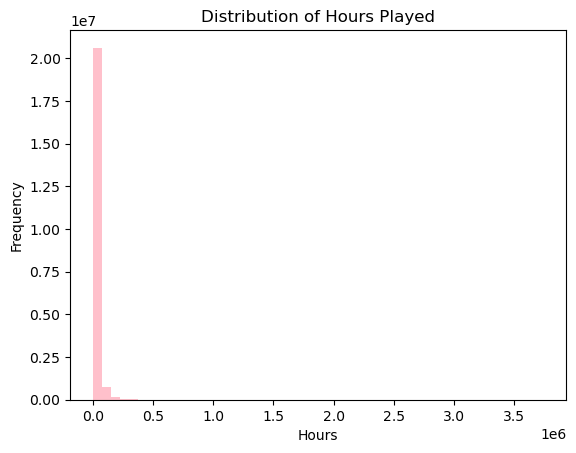

In [16]:
df["author.playtime_forever"].plot(kind="hist",
                             bins = 50,
                             title="Distribution of Hours Played", color="pink").set_xlabel("Hours")
plt.show()

### Multivariate Analysis

In [17]:
df["recommended_num"] = df["recommended"].apply(lambda x: 1 if x == True else 0).astype('int8')
df["written_during_early_access_num"] = df["written_during_early_access"].apply(lambda x: 1 if x == True else 0).astype('int8')


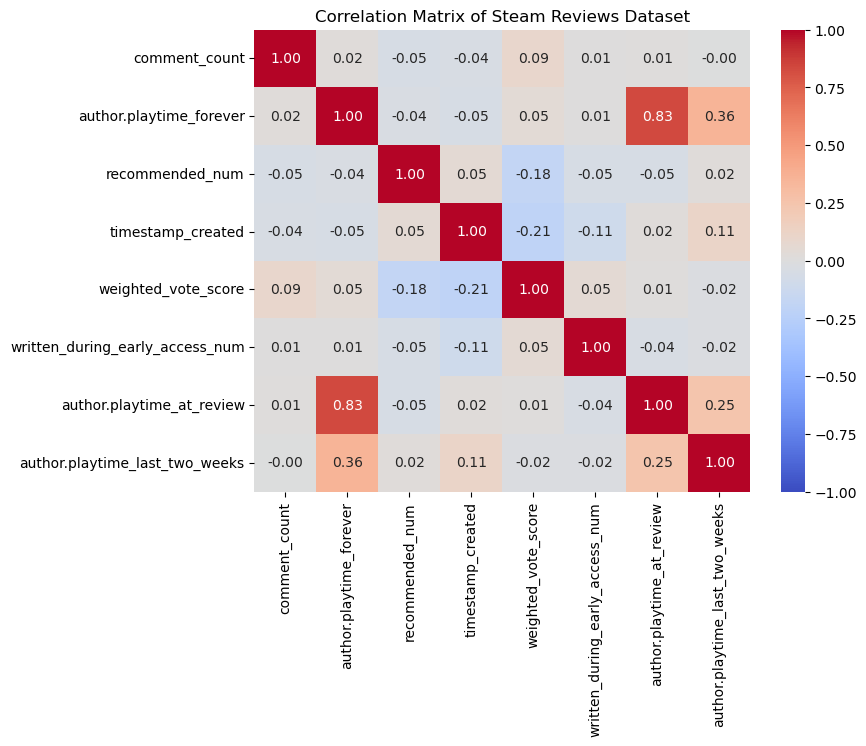

In [18]:
correlations = df[["comment_count", "author.playtime_forever",
                   "recommended_num", "timestamp_created",
                   "weighted_vote_score", "written_during_early_access_num",
                   "author.playtime_at_review","author.playtime_last_two_weeks"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Steam Reviews Dataset')
plt.show()

## [RQ2] Let's explore the dataset by analyzing the distribution of reviews across different applications.

### Identify which applications have the highest and lowest number of reviews.

In [19]:
total_reviews = df["review"].shape[0]
print("Total number of reviews:", total_reviews)

# Most reviewed apps
most_reviewed = df.groupby("app_name")["review"].size().sort_values(ascending=False)
most_reviewed## Plot the number of reviews for each application in descending order. What insights can you draw from the plot?

Total number of reviews: 21612444


app_name
PLAYERUNKNOWN'S BATTLEGROUNDS      1644255
Grand Theft Auto V                 1019116
Tom Clancy's Rainbow Six Siege      841918
Terraria                            672815
Garry's Mod                         655524
                                    ...   
Don't Escape: 4 Days to Survive       1013
Shadow Complex Remastered              700
Out of the Park Baseball 19            700
DRAGON QUEST HEROES™ II                600
Neon Hardcorps                         200
Name: review, Length: 315, dtype: int64

### Plot the number of reviews for each application in descending order. What insights can you draw from the plot?


Double tap in order to zoom


c:\Users\Leonardo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Leonardo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Leonardo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Leonardo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33521 (\N{CJK UNIFIED IDEOGRAPH-82F1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Leonardo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20256 (\N{CJK UNIFIED IDEOGRAPH-4F20}) missing from current font.
  fig.canvas.prin

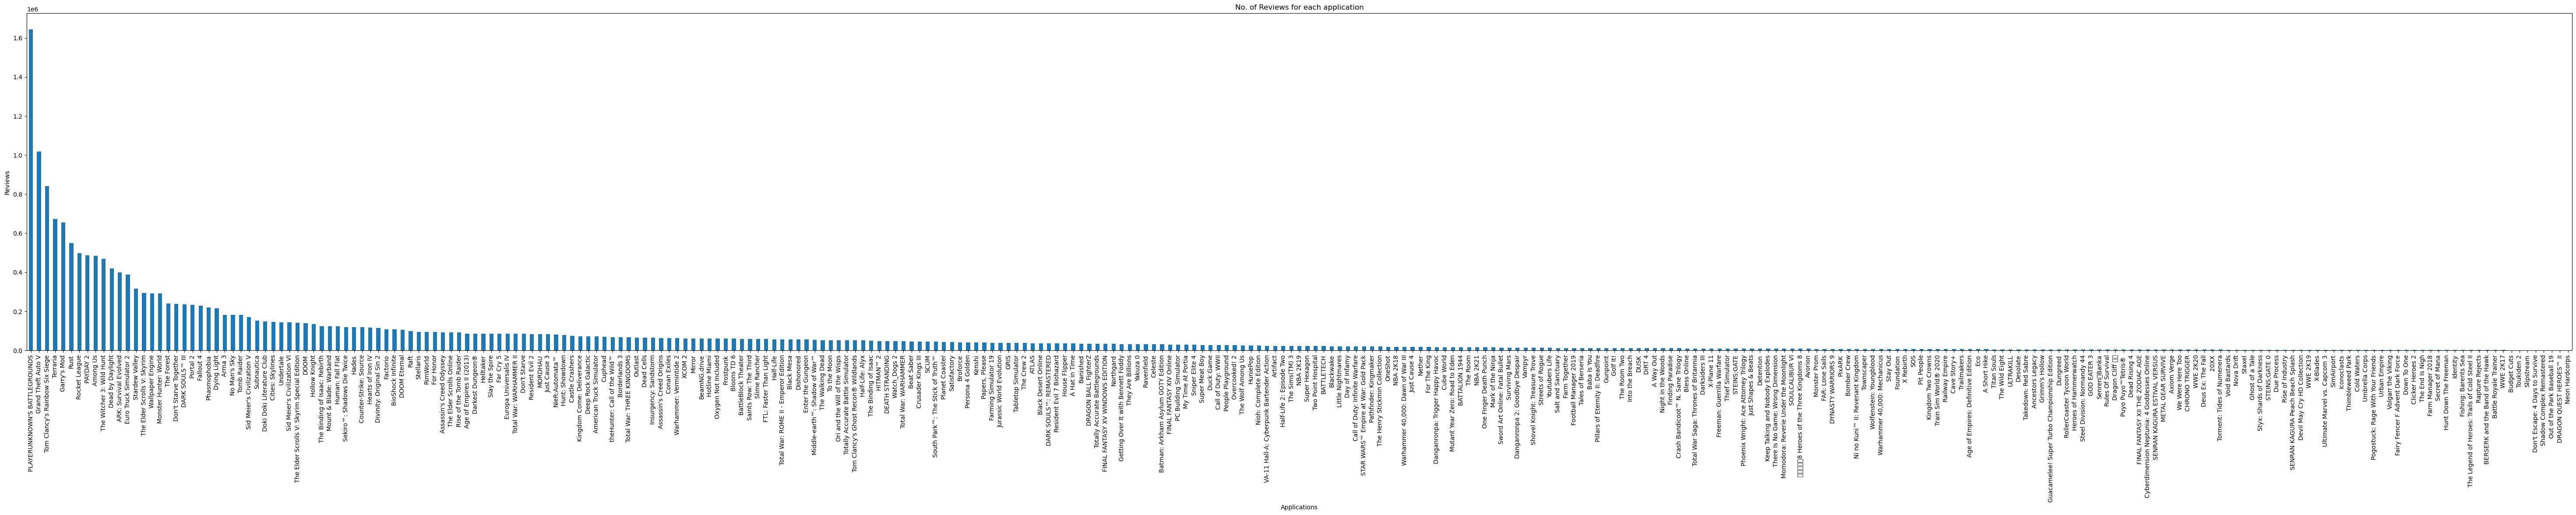

In [20]:
print("Double tap in order to zoom")
most_reviewed.plot(kind="bar", figsize=(75,10),
                      xlabel='Applications', ylabel = 'Reviews',
                      title ='No. of Reviews for each application')
plt.show()

### Comments on plot:
The plot shows a clear disparity in review counts between the most and least reviewed games, with the most reviewed getting more than 1 million reviews. The most reviwed games like PLAYERUNKNOWN'S BATTLEGROUNDS or Grand Theft Auto V are very mainstream games so it's not surprising the fact that they are in the top 5 of the list.

### For the top 5 applications by number of reviews, how many reviews came from users who purchased the application versus those who received it for free? Provide a percentage breakdown and highlight any similarities.

In [21]:
top_apps = most_reviewed.head(5).index
top_apps_reviews = {}

for app in top_apps:
    # Filter reviews for the current app
    app_reviews = df[df["app_name"] == app]

    # Count reviews by purchase status
    purchased_num = app_reviews[app_reviews["steam_purchase"] == True].shape[0]
    free_num = app_reviews[app_reviews["steam_purchase"] == False].shape[0]

    # Percentage Breakdown
    purchased_per = round((purchased_num / total_reviews) * 100, 2)
    free_per = round((free_num / total_reviews) * 100, 2)
    top_apps_reviews[app] = {"Number of Purchased": purchased_num, "Number of Free": free_num,
                         "Percentage of Purchase":f"{purchased_per:.2f}%","Percentage of Free":f"{free_per:.2f}%"}

top_5_reviews = pd.DataFrame(top_apps_reviews).T
print(top_5_reviews )

                               Number of Purchased Number of Free  \
PLAYERUNKNOWN'S BATTLEGROUNDS              1372721         271534   
Grand Theft Auto V                          905288         113828   
Tom Clancy's Rainbow Six Siege              702505         139413   
Terraria                                    527762         145053   
Garry's Mod                                 551250         104274   

                               Percentage of Purchase Percentage of Free  
PLAYERUNKNOWN'S BATTLEGROUNDS                   6.35%              1.26%  
Grand Theft Auto V                              4.19%              0.53%  
Tom Clancy's Rainbow Six Siege                  3.25%              0.65%  
Terraria                                        2.44%              0.67%  
Garry's Mod                                     2.55%              0.48%  


### Comments on Similarities
As we can see from the percentage break down most of the reviews in general are coming from users who have purchased these apps

### Which applications have the most and the least user recommendations? Summarize your findings.

In [22]:
# Separate counts of 1(recommended) and 0(not recommended)  for each app
recommendations = df.groupby("app_name")["recommended_num"].value_counts().unstack(fill_value=0)

# Rename the columns
recommendations.columns = ["Not Recommended (0)", "Recommended (1)"]
recommendations

,Not Recommended (0),Recommended (1)
app_name,,
20XX,261,3349
A Hat in Time,661,34318
A Short Hike,50,5797
A Way Out,1175,9766
ARK: Survival Evolved,84766,315243
...,...,...
XCOM 2,8904,52732
Yakuza 0,2001,29774
Youtubers Life,3055,9566


In [23]:
# Most and least recommended apps
recommendations.sort_values(by="Recommended (1)", ascending=False)

,Not Recommended (0),Recommended (1)
app_name,,
PLAYERUNKNOWN'S BATTLEGROUNDS,757838,886417
Grand Theft Auto V,187805,831311
Tom Clancy's Rainbow Six Siege,99521,742397
Terraria,14074,658741
Garry's Mod,22966,632558
...,...,...
Out of the Park Baseball 19,106,594
Shadow Complex Remastered,113,587
Identity,1365,439


Now let's summarize our findings watching the top 5 most recommened apps and the least 5 recommended ones.

In [24]:
most_recommended=recommendations["Recommended (1)"].sort_values(ascending=False).head(5)
least_recommended=recommendations["Recommended (1)"].sort_values(ascending=False).tail(5)

print("The top 5 most recommended apps are: ")
display(pd.DataFrame(most_recommended))
print("The least 5 recommended apps are: ")
display(pd.DataFrame(least_recommended))

The top 5 most recommended apps are: 


,Recommended (1)
app_name,
PLAYERUNKNOWN'S BATTLEGROUNDS,886417
Grand Theft Auto V,831311
Tom Clancy's Rainbow Six Siege,742397
Terraria,658741
Garry's Mod,632558


The least 5 recommended apps are: 


,Recommended (1)
app_name,
Out of the Park Baseball 19,594
Shadow Complex Remastered,587
Identity,439
DRAGON QUEST HEROES™ II,423
Neon Hardcorps,89


### Is there a correlation between the number of recommendations and the applications' review scores? Use a statistical test to confirm the significance of the relationship.

In [25]:
correlation_df=pd.DataFrame({"Total Recommendations": df[df["recommended_num"] == 1].groupby("app_name")["recommended_num"].count(),
                             "Average Review Score": df.groupby("app_name")["weighted_vote_score"].mean()}).dropna()
correlation_df

,Total Recommendations,Average Review Score
app_name,,
20XX,3349,0.209921
A Hat in Time,34318,0.167747
A Short Hike,5797,0.138672
A Way Out,9766,0.161331
ARK: Survival Evolved,315243,0.193326
...,...,...
XCOM 2,52732,0.174441
Yakuza 0,29774,0.197277
Youtubers Life,9566,0.250776


In [26]:
# Calculate Pearson correlation coefficient and p-value
corr_coefficient, p_value = pearsonr(correlation_df["Total Recommendations"], correlation_df["Average Review Score"])
print(f"Correlation Coefficient: {corr_coefficient:.2f}")
print(f"P-Value: {p_value:.8f}")

if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Correlation Coefficient: -0.30
P-Value: 0.00000005
The correlation is statistically significant.


### Coment on results:
The fact that the correlation is negative an significant means that there is an inverse relationship between the two variables.More specifically, applications with higher scores may have fewer recommendations, or vice versa.

# [RQ3] Understanding when users are most active in submitting reviews can help identify peak engagement periods

## Q1)Plot the number of reviews submitted each month and describe any trends.

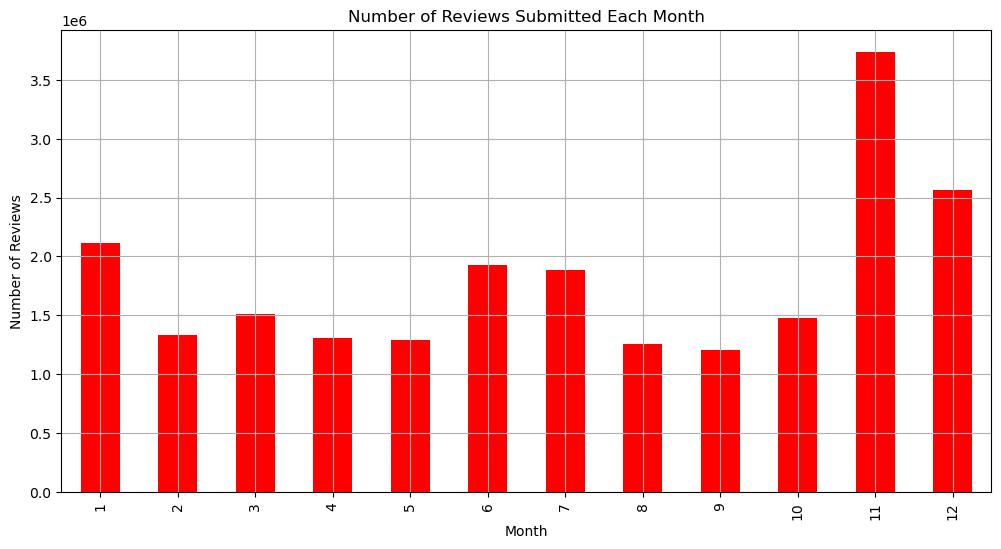

In [27]:
# Here we convert the timestamp to datetime fomat.
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')

# We extract the months into new column, then group and count the reviews in every month.
df['month'] = df['timestamp_created'].dt.month
monthly_reviews = df.groupby('month').size()

# We plot the graph of no.of reviews in each month.
plt.figure(figsize=(12, 6))
monthly_reviews.plot(kind='bar', color='r')
plt.title("Number of Reviews Submitted Each Month")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.show()

## Q2) and Q3) Identify any seasonal patterns or trends in review activity. Explain any seasonal impact you notice.Determine if certain times of the year have higher engagement rates. Describe noticeable peaks in user activity.
### Ans) As it is clear from the graph that highest number of reviews appear in winter especially in the month of november followed by the month of december and january. This can be due to reason of many different sales avilable in these months like black friday sale and christams sales as well new year sales as well. Also there is increase in the user engagemnet in the summer months which is june and july and it can be due to the summer sales and summer vacations(holidays) in which people usually prefer some activities like games etc. September has the fewest user engagement as per the graph the reason can be the end of summer vacations and start of the fall session.

## Q4) What is the most common time of day users write reviews? For example, users might typically write reviews at 17:44. Explain how this time distribution could influence your analysis.
### Ans) Identifying this time distribution can help in extracting the information about the trends . Analyse the users behaviour at which usually user is more active and prefer giving reviews. From the response it is clear that most common time is in the afternoon between 2:30 - 3:00 which reflects that user is more relaxed at this time and potentially leads to bias in their response. Also it gives us an insights about user activity so that we keep this time in consideration for the next releases to increase user engangement.

In [28]:
#  here we extract the time in hh:mm format from each review timestamp
df['time'] = df['timestamp_created'].dt.strftime('%H:%M')

# we find the frequency of the time and the time which appears most of the time is extracted . This gives us the time of the day at which most of the users write reviews.
most_common_time = df['time'].mode()[0]
print(most_common_time)


14:50


## Q5) and Q6) Create a function that accepts a list of time intervals and plots the number of reviews for each interval. Use the function to plot the number of reviews for the following time intervals:

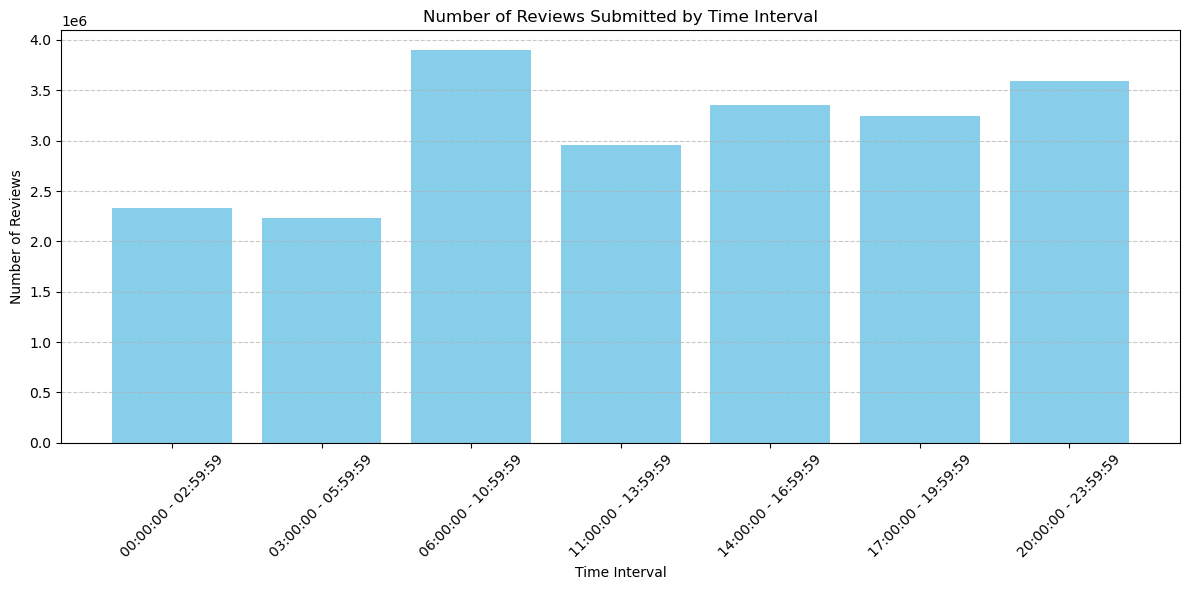

In [29]:
df['time'] = df['timestamp_created'].dt.time
def plot_reviews_by_intervals(intervals):

    interval_counts = []

    # we Loop through each interval and then count reviews within that time range.
    for start, end in intervals:
        # Filter reviews within the current interval
        count = df[(df['time'] >= start) & (df['time'] <= end)].shape[0]
        interval_counts.append(count)

    # Plot the counts for each interval
    interval_labels = [f"{start} - {end}" for start, end in intervals]
    plt.figure(figsize=(12, 6))
    plt.bar(interval_labels, interval_counts, color='skyblue')
    plt.title("Number of Reviews Submitted by Time Interval")
    plt.xlabel("Time Interval")
    plt.ylabel("Number of Reviews")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Here we define the time intervals within which we have to find the reviews.
intervals = [
    (pd.to_datetime('00:00:00').time(), pd.to_datetime('02:59:59').time()),
    (pd.to_datetime('03:00:00').time(), pd.to_datetime('05:59:59').time()),
    (pd.to_datetime('06:00:00').time(), pd.to_datetime('10:59:59').time()),
    (pd.to_datetime('11:00:00').time(), pd.to_datetime('13:59:59').time()),
    (pd.to_datetime('14:00:00').time(), pd.to_datetime('16:59:59').time()),
    (pd.to_datetime('17:00:00').time(), pd.to_datetime('19:59:59').time()),
    (pd.to_datetime('20:00:00').time(), pd.to_datetime('23:59:59').time())
]
# Use the function to plot the data
plot_reviews_by_intervals(intervals)

## [RQ4] Investigating whether users who spend more time using an application give higher or lower ratings.



### Q1)Analyze the relationship between the amount of time a user has spent on an application and their review score.

Correlation: 0.05


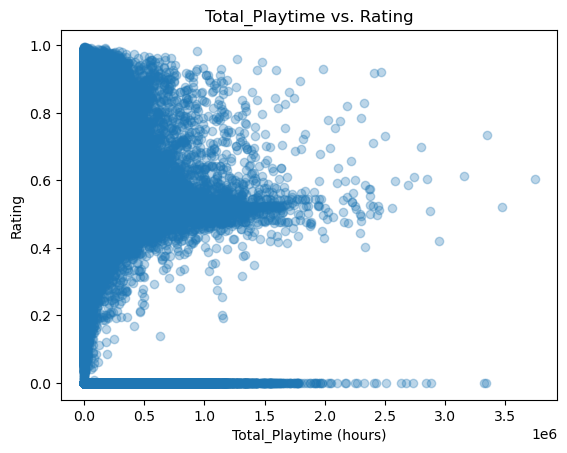

In [30]:
# First we find the correlaton between the 2 columns to find the reltion between the two.
correlation_playtime_rating = df['author.playtime_forever'].corr(df['weighted_vote_score'])
print("Correlation:", round(correlation_playtime_rating, 2))

# We use the Scatter plot to find the relation between the two columns grapically.
plt.scatter(df['author.playtime_forever'], df['weighted_vote_score'], alpha=0.3)
plt.xlabel('Total_Playtime (hours)')
plt.ylabel('Rating')
plt.title('Total_Playtime vs. Rating')
plt.show()

### Q2) Do more experienced users (who have used the application longer) tend to give higher or lower ratings? Comment on any trends you observe.
### Ans) I calculated the correlation betweeen the author playtime and weighted score and it came out to be 0.05 which clearly suggests very weak relation between the two . As the user time increases it doesn't show any significant effect on the reviews or ratings.

### Q3) Plot the distribution of review scores based on different user experience levels (e.g., new users vs. veteran users). Is there a statistical difference in the score distributions? Use an appropriate statistical test to validate your hypothesis.

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_16448\1566106372.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_scores = df.groupby('experience_level')['weighted_vote_score'].mean().reset_index()
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_16448\1566106372.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='experience_level', y='weighted_vote_score', data=average_scores, palette='Set2')


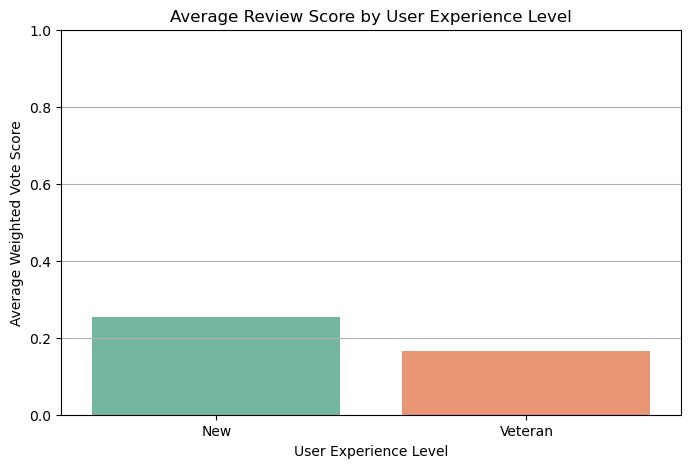

Mann-Whitney U test statistic: 1321613489441.0, p-value: 0.0
Reject the null hypothesis: There is a signifiant statistical difference between the groups.


In [31]:
# First we create a new column name experience_level and it ontains data like new and veteran users based on the time spent on the game.
df['experience_level'] = pd.cut(df['author.playtime_forever'],
                                 bins=[0, 20, float('inf')],
                                 labels=['New', 'Veteran'],
                                 right=False)

# Then we Calculate average review score for each experience level and store it in average_score variable
average_scores = df.groupby('experience_level')['weighted_vote_score'].mean().reset_index()

# Then we plot a graph using bar plot for the comparison between new and veteran users to get insights about the data in graphical representation.
plt.figure(figsize=(8, 5))
sns.barplot(x='experience_level', y='weighted_vote_score', data=average_scores, palette='Set2')
plt.title('Average Review Score by User Experience Level')
plt.xlabel('User Experience Level')
plt.ylabel('Average Weighted Vote Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

# We Perform Statistical testing.
# Separate the scores for each group for further statistical testing.
new_users_scores = df[df['experience_level'] == 'New']['weighted_vote_score']
veteran_users_scores = df[df['experience_level'] == 'Veteran']['weighted_vote_score']

# We Perform the Mann-Whitney U test to check if there is a statistical difference in the score distributions
stat, p_value = stats.mannwhitneyu(new_users_scores, veteran_users_scores)

# Step 5: Output the results
alpha = 0.05
print(f"Mann-Whitney U test statistic: {stat}, p-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: There is a signifiant statistical difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant statistical difference between the groups.")

### Q4) Ask an LLM tool (ChatGPT, Claude AI, etc.) to interpret the statistical results of the analysis and provide potential explanations for the trends. Does the LLM suggest additional factors that could explain why users who spend more time on the app give higher or lower ratings? How can you validate the interpretations provided by the LLM?.
#### Ans)  The Mann-Whitney U test shows a significant difference in review scores between new and veteran users (p-value = 0.0), meaning experience level likely impacts ratings. Veteran users may rate differently due to greater familiarity with the app, either appreciating its depth or becoming more critical over time. We can vlaidate LLM tools response by further diving deep into analytical part like dividing data into further sub intervals to see how it affects the distirbution also peforming time based analysis.

## [RQ5] It is interesting to explore the top reviewers to gain insight into their demographic location, the quality of their reviews, and the applications they tend to review most frequently.

### Determine the ten reviewers with the highest number of reviews in the df

In [32]:
#num_reviews_per_author contains total reviews for observations with the same author.steamid
num_reviews_per_author = df.groupby('author.steamid')['author.num_reviews'].sum().reset_index()
#top_10_num_reviews_per_author contains the top ten observations from the df sorted in descending order by the variable "author.num_reviews"
top_10_num_reviews_per_author = num_reviews_per_author.sort_values(by='author.num_reviews', ascending=False).head(10)
print(top_10_num_reviews_per_author)

             author.steamid  author.num_reviews
3709309   76561198103272004       4398046511108
10401099  76561198848008157       4398046511105
1849199   76561198045381877              242288
2409169   76561198062813911              239908
5055      76561197960373660              202713
3461634   76561198094803808              194255
224925    76561197974092119              190141
960101    76561198013146396              187654
1757205   76561198043049777              170072
4060710   76561198116879965              163030


To find the ten reviewers with the highest number of reviews we summed num_reviews for observations with the same author.steamid, and then we have sorted the df in descending order by the variable "author.num_reviews", and then selected the top ten observations from the sorted df.It’s immediately evident that two top reviewers have a value for variable "num_reviews" very high, which could indicate either an error or anomalous data.
The top reviewers have steamid in the following list:
* 76561198103272004  
* 76561198848008157       
* 76561198045381877
* 76561198062813911              
* 76561197960373660              
* 76561198094803808              
* 76561197974092119              
* 76561198013146396              
* 76561198043049777              
* 76561198116879965              


### What is the percentage of each language used by these top 10 reviewers when submitting a review?


In [33]:
#top_10_reviews contains only the observations related to reviews by the top ten reviewers
top_10_reviews = df[df['author.steamid'].isin(top_10_num_reviews_per_author['author.steamid'])]
#language_freq contains frequencies
language_freq= top_10_reviews['language'].value_counts()
#language_perc contains percentage
language_perc = (language_freq / language_freq.sum()) * 100
print(language_perc)


language
english      60.932476
russian      21.061093
brazilian     9.003215
polish        8.842444
latam         0.160772
Name: count, dtype: float64


We first selected only the observations related to reviews by the top ten reviewers. Then we counted how often each language was used and calculated the percentage of each language employed by these top 10 reviewers when submitting a review.
The percentages calculated are:
* english :     61%
* russian :    21%
* brazilian :   8.9%
* polish :      8.8%
* latam  :      0.2%

### Let's examine whether other users found the reviews from these top 10 reviewers helpful or if they were simply spamming. Calculate the average number of valuable votes these reviewers received for their submitted reviews. Elaborate on the results you see.



In [34]:
#df_top_10 contains only the observations related to reviews by the top ten reviewers
df_top_10 = df[df['author.steamid'].isin(top_10_num_reviews_per_author['author.steamid'].values)]
#df_top_10_avg_votes contains the average votes_helpful of the top 10 reviewers
df_top_10_avg_votes = df_top_10.groupby('author.steamid')['votes_helpful'].mean().reset_index()
#df_avg_votes contains the average votes_helpful of all reviewers
df_avg_votes = df.groupby('author.steamid')['votes_helpful'].mean().reset_index()
print(df_top_10_avg_votes)

      author.steamid  votes_helpful
0  76561197960373660       6.040816
1  76561197974092119       7.727273
2  76561198013146396       0.969388
3  76561198043049777       6.300000
4  76561198045381877       2.264706
5  76561198062813911       0.891892
6  76561198094803808       4.243243
7  76561198103272004       0.000000
8  76561198116879965      10.205882
9  76561198848008157       0.000000


We have created a dataset with only top 10 reviewers and we have calculated the average of the votes_helpful variable for each top ten reviewers in "df_top_10_avg_votes" and for each author in "df_avg_votes". The idea is that to make considerations about the hypothesis "top 10 reviewers were only spamming or not", It's useful know the distribution of votes_helpful variable based on all reviewers too.

In [35]:
#calculate median, third quartile, and 95th percentile
median=df_avg_votes['votes_helpful'].quantile(0.50)
quant95 = df_avg_votes['votes_helpful'].quantile(0.95)
quant75 = df_avg_votes['votes_helpful'].quantile(0.75)
print(median,quant75,quant95)
#compare the average votes_helpful of the top 10 reviewers with total number of reviews for each  top 10 reviewers
print(df_top_10_avg_votes)
print(top_10_num_reviews_per_author[['author.steamid','author.num_reviews']])

0.0 0.6363636363636364 3.0
      author.steamid  votes_helpful
0  76561197960373660       6.040816
1  76561197974092119       7.727273
2  76561198013146396       0.969388
3  76561198043049777       6.300000
4  76561198045381877       2.264706
5  76561198062813911       0.891892
6  76561198094803808       4.243243
7  76561198103272004       0.000000
8  76561198116879965      10.205882
9  76561198848008157       0.000000
             author.steamid  author.num_reviews
3709309   76561198103272004       4398046511108
10401099  76561198848008157       4398046511105
1849199   76561198045381877              242288
2409169   76561198062813911              239908
5055      76561197960373660              202713
3461634   76561198094803808              194255
224925    76561197974092119              190141
960101    76561198013146396              187654
1757205   76561198043049777              170072
4060710   76561198116879965              163030


we can observed that 95% of population has up to 3 votes_helpful, 75% of population has up to
0.666 votes_helpful and 50% of population has 0 votes_helpful in the dataset df. Among
the top reviewers only two received only 0 votes_helpful,which aligns with the general trend observed in the majority of the population.
However, it’s unexpected that the two top reviewers with the highest number of reviews both received
0 votes_helpful. so this could mean or an error in the recorded number of reviews, or that these reviewers were simply spamming.
the other top reviewers receveid a votes_helpful higher of 0, a behavior seen in a smaller portion
of the population, so based on this information we cannot conclude that the other top reviewers are only spamming



### Create a plot showing the distribution of the number of reviews each application received from the top 10 reviewers, arranged in descending order.

                         app_name  num_reviews
37         Counter-Strike: Source            8
93                      HITMAN™ 2            8
137                      PAYDAY 2            7
53               Dead by Daylight            7
95                      Half-Life            7
..                            ...          ...
78                      Far Cry 5            1
165                Slay the Spire            1
164                    SimAirport            1
79              Farm Manager 2018            1
228  theHunter: Call of the Wild™            1

[229 rows x 2 columns]


<Axes: title={'center': 'Number of reviews per app'}, xlabel='app_name', ylabel='num_reviews'>

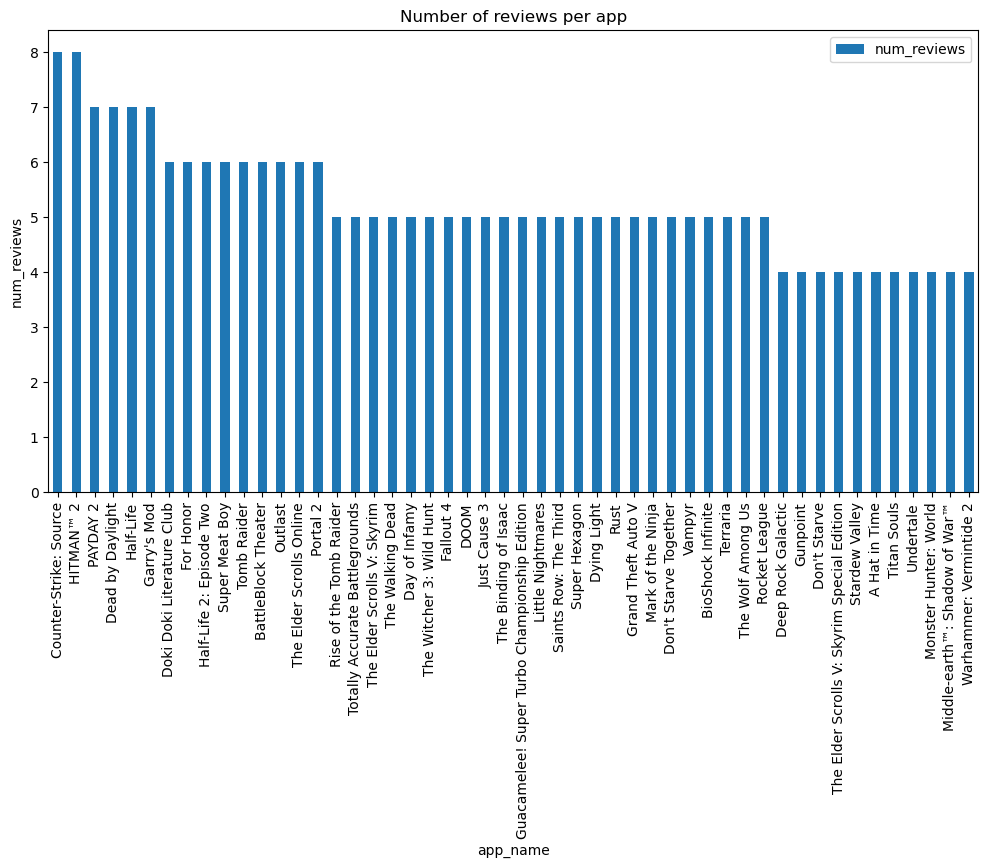

In [36]:
#contains only the observations related to reviews by the top ten reviewers
top_10_reviews = df[df['author.steamid'].isin(top_10_num_reviews_per_author['author.steamid'])]
#num_reviews_per_game contains total number of reviews per each mode of 'app_name' variable
num_reviews_per_game = top_10_reviews.groupby('app_name').size().reset_index(name='num_reviews')
#num_reviews_per_games sorted the dataset num_reviews_per_game in descending order
num_reviews_per_games = num_reviews_per_game.sort_values(by='num_reviews', ascending=False)

print(num_reviews_per_games)
#create a bar plot with the number of reviews on the y-axis labeled as "num_reviews" and 'app_name' on the x-axis.
num_reviews_per_games.head(50).plot.bar(x='app_name', y='num_reviews', ylabel="num_reviews", title="Number of reviews per app", figsize=(12, 6), stacked=False)



To improve visualization we have shown only the top 50 games with the highest number of reviews by the top ten reviewers. Displaying all games would make the game names on the x-axis unreadable due to overlap

## [RQ6] Let's investigate the behavior of specific groups, specifically focusing on English and Spanish reviewers

- Which group is more likely to edit or update their review after submitting it? “English or Spanish!”?
- Provide the average number of games that reviewers from each group have on their Steam accounts and the average number of games for which they write reviews. What can you say about the number you just calculated?

In [37]:
# Use only columns needed for the question
use_columns = [
    'app_id',
    'review_id',
    'language',
    'timestamp_created',
    'timestamp_updated',
    'author.steamid',
    'author.num_games_owned',
]

# Separate the dataset by language
df_eng = df[df["language"]=="english"][use_columns]
df_spa = df[df["language"]=="spanish"][use_columns]

# The size of the dataframes should be 0.86 GB and 0.07 GB

### Compare the likelihood of review updates between English and Spanish reviewers
**Assumption**: a review has been updated if its creation and update timestamps differ, as this would indicate an edit by the user.

In [38]:
# Calculate the frequency of english updates
upd_freq_eng = len(df_eng[df_eng["timestamp_created"]!=df_eng["timestamp_updated"]])/len(df_eng)

# Calculate the frequency of spanish updates
upd_freq_spa = len(df_spa[df_spa["timestamp_created"]!=df_spa["timestamp_updated"]])/len(df_spa)

# Print the results
print(f"The percentage of updated english review is {upd_freq_eng*100:.2f}%")
print(f"The percentage of updated spanish review is {upd_freq_spa*100:.2f}%")

The percentage of updated english review is 100.00%
The percentage of updated spanish review is 100.00%


The results suggest that English users have a marginally higher likelihood of updating their reviews compared to Spanish users.

### Average games owned by reviewers in each group

#### Dataset Considerations:
- **Inconsistent Ownership Records**: The number of games owned by a reviewer is inconsistent, likely due to time-stamped recording that does not update with new reviews.
- **Ownership Assumption**: Since Steam ownership is effectively lifelong, we use the maximum recorded games owned per reviewer.

In [39]:
# Get a Pandas Series with the max record of owned game per english reviewer
temp = df_eng.groupby("author.steamid")["author.num_games_owned"].max()
# Get the mean
avg_games_owned_eng = temp.mean()

# Same process for spanish users
temp = df_spa.groupby("author.steamid")["author.num_games_owned"].max()
avg_games_owned_spa = temp.mean()

print(f"The average games owned by english reviewers is {avg_games_owned_eng:.2f}")
print(f"The average games owned by spanish reviewers is {avg_games_owned_spa:.2f}")

The average games owned by english reviewers is 2495362.32
The average games owned by spanish reviewers is 83.94


Clearly, there's an anomaly in the records of games owned by English reviewers, as an average exceeding $10^6$ games isn't reasonable.
Let's take a closer peek at these records to identify potential causes:

In [40]:
sorted_df = df_eng.sort_values(by="author.num_games_owned", ascending=False)
print(sorted_df[["author.steamid", "author.num_games_owned"]].head(20).to_string(index=False))

   author.steamid  author.num_games_owned
76561198039421205           4398046511619
76561198070649181           4398046511170
76561198127787009           4398046511151
76561197979911851                   22024
76561197979911851                   22023
76561197979911851                   22019
76561197979911851                   21980
76561197979911851                   21979
76561198001678750                   21865
76561198001678750                   21865
76561198001678750                   21865
76561198001678750                   21865
76561197969050296                   20972
76561197969050296                   20969
76561198037867621                   20420
76561198037867621                   20417
76561198037867621                   20391
76561197995008105                   19465
76561197995008105                   19465
76561197995008105                   19465


Our inspection reveals three entries with exceptionally high values alongside others in the range of $10^4$. The latter may be plausible for certain avid gamers, but values in the millions need further analysis.

Let's compute some statistics for those high-value records to better assess their validity:

In [41]:
# Group the DataFrame by author and compute min, max and count
summary_stats = df_eng.groupby("author.steamid")["author.num_games_owned"].agg(['min', 'max', 'std','count']).reset_index()

# Order the results by the max and print the first 20 results
sorted_stats = summary_stats.sort_values(by='max', ascending=False)
print(sorted_stats.head(20).to_string(index=False))

   author.steamid           min           max          std  count
76561198039421205           515 4398046511619 2.539213e+12      3
76561198070649181 4398046511170 4398046511170          NaN      1
76561198127787009            47 4398046511151 2.539213e+12      3
76561197979911851         21979         22024 2.335594e+01      5
76561198001678750         21865         21865 0.000000e+00      4
76561197969050296         20969         20972 2.121320e+00      2
76561198037867621         20391         20420 1.594783e+01      3
76561197995008105         19451         19465 7.000000e+00      4
76561198040421250         19022         19024 1.014599e+00     17
76561197967735572         18956         18956          NaN      1
76561197979667190         18640         18666 1.353514e+01      5
76561197976597747         17767         17767          NaN      1
76561198121398682         17312         17344 1.272102e+01     24
76561197968410781         17206         17239 1.650000e+01      4
7656119835

For the three highest values, we observe the following:
- one of these values is the sole record for its author;
- the other two authors have other records significantly lower than the maximum.

Additionally, the standard deviation for these high values is substantial, suggesting they are likely noise.

The other high values in the $10^4$ range appear legitimate: there are circa $10^5$ games available on Steam as of 2024, so these records are plausible.

Given the limited amount of noise, we can manage it by filtering out records above the $10^5$ threshold.

In [42]:
# Get a Pandas Series with the max record of owned game per english reviewer
temp = df_eng.groupby("author.steamid")["author.num_games_owned"].max()
# Filter by reasonable values
temp = temp[temp<10**5]
# Get and print the new mean
avg_games_owned_eng = temp.mean()
print(f"The average games owned by english reviewers, filtering the noise, is {avg_games_owned_eng:.2f}")

The average games owned by english reviewers, filtering the noise, is 119.66


This adjusted value falls within a realistic range.

To verify consistency, let's also analyze the values for Spanish reviewers:

In [43]:
# Group the DataFrame by author and compute min, max and count
summary_stats = df_spa.groupby("author.steamid")["author.num_games_owned"].agg(['min', 'max', 'std', 'count']).reset_index()

# Order the results by the max and print the first 20 results
sorted_stats = summary_stats.sort_values(by='max', ascending=False)
print(sorted_stats.head(20).to_string(index=False))

   author.steamid   min   max      std  count
76561197971339745 11727 11737 3.535534      8
76561197966617426 10936 10936      NaN      1
76561198103654291 10413 10414 0.707107      2
76561198028415882 10411 10411      NaN      1
76561198010294701 10107 10107      NaN      1
76561198028018671  9840  9840 0.000000      3
76561197996069336  9417  9417      NaN      1
76561197964113710  9267  9267 0.000000      2
76561197987753384  9207  9207      NaN      1
76561197989849128  9176  9176 0.000000      2
76561198078685126  9044  9045 0.447214      5
76561198003770847  8973  8973 0.000000     16
76561198152266459  8689  8690 0.577350      3
76561197971508760  8514  8514      NaN      1
76561198092054750  8489  8489 0.000000      2
76561197990587455  8418  8418      NaN      1
76561198015952586  8408  8409 0.577350      4
76561198041196449  8404  8404 0.000000      2
76561197993612995  8309  8318 3.868678      6
76561198158888154  8282  8282      NaN      1


These records have a low standard deviation and appear legitimate, so the previously computed average number of games owned by Spanish reviewers is valid.

From this analysis, we can conclude with confidence that English reviewers own, on average, nearly 50% more games than Spanish reviewers.

### Average games reviewed by each group

**Assumption**: we are interested in the number of games reviewed in the language of the group.

For the numbers of games reviewd by each user, we can count the different `app_id` recorded under his `author.steamid`.

In [44]:
# For English authors: count distinct app_id per author.steamid and merge back to df_eng
temp_eng = df_eng.groupby("author.steamid")['app_id'].nunique().rename("num_reviews")
df_eng = df_eng.merge(temp_eng, on="author.steamid", how="left")
# Compute the average of the temp series
avg_rev_eng = temp_eng.mean()

# Same for the spa dataframe
temp_spa = df_spa.groupby("author.steamid")['app_id'].nunique().rename("num_reviews")
df_spa = df_spa.merge(temp_spa, on="author.steamid", how="left")
avg_rev_spa = temp_spa.mean()

print(f"The average number of games reviewed in english by english authors is {avg_rev_eng:.2f}")
print(f"The average number of games reviewed in spanish by spanish authors is {avg_rev_spa:.2f}")

The average number of games reviewed in english by english authors is 1.81
The average number of games reviewed in spanish by spanish authors is 1.63


**Conclusion**: english authors on average review slightly more games than spanish ones, altough non proportionally to the average of games owned.

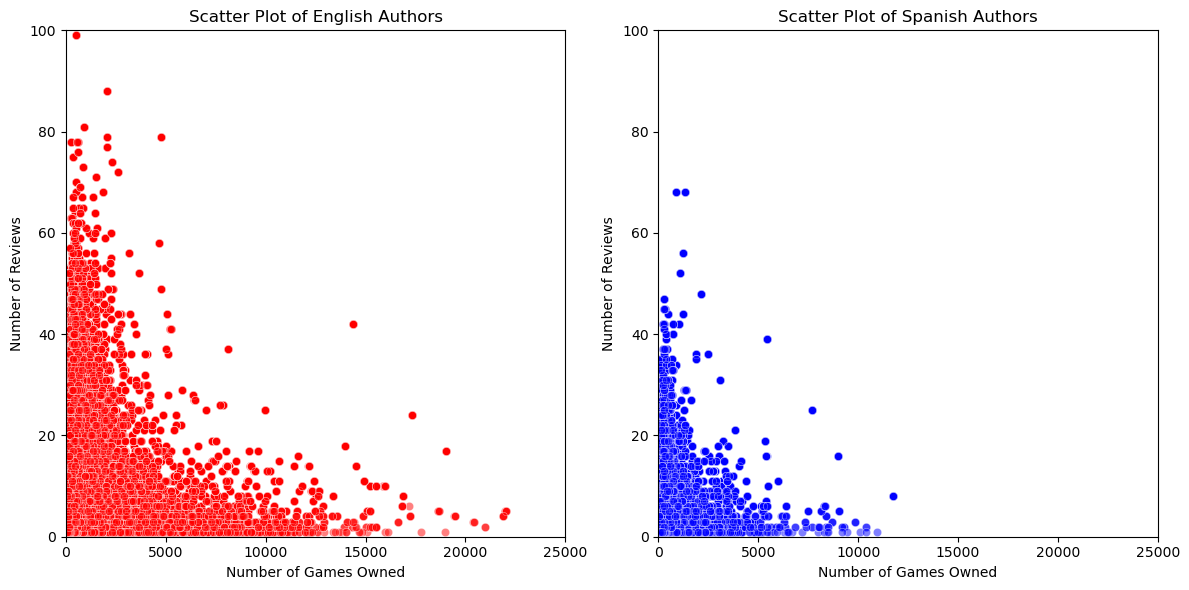

In [45]:
# Get rid of noise
df_eng = df_eng[df_eng['author.num_games_owned']<10**5]

# Set the figure size
plt.figure(figsize=(12, 6))

# Define limits for x and y axes
x_limit = 25000
y_limit = 100

# Scatter plot for English authors
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_eng,
                x='author.num_games_owned',
                y='num_reviews',
                alpha=0.5,
                color='red')
plt.xlim(0, x_limit)
plt.ylim(0, y_limit)
plt.title('Scatter Plot of English Authors')
plt.xlabel('Number of Games Owned')
plt.ylabel('Number of Reviews')

# Scatter plot for Spanish authors
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_spa,
                x='author.num_games_owned',
                y='num_reviews',
                alpha=0.5,
                color='blue')
plt.xlim(0, x_limit)
plt.ylim(0, y_limit)
plt.title('Scatter Plot of Spanish Authors')
plt.xlabel('Number of Games Owned')
plt.ylabel('Number of Reviews')

# Show the plot
plt.tight_layout()
plt.show()


As we can see, this is due to the fact that the distribution of English authors is more spread along the axis of games owned than along the axis of reviews given, especially in comparison to Spanish authors. This suggests that English users tend to accumulate larger game libraries, but don’t necessarily increase their reviewing frequency proportionally.

One possible explanation for this is that English-speaking regions might have a higher number of game bundles, sales, or subscription-based access, allowing users to collect many games at once without a corresponding increase in engagement through reviews.

In [46]:
# Delete the filtered dataframes to save RAM
del df_eng
del df_spa


## [RQ7] Certainly, calculating probabilities and conducting statistical tests are essential skills for any data scientist. Let's calculate some intriguing figures.


### What is the probability of submitting a review and receiving at least one helpful vote from other users?

In [47]:
# 1- probability that 'votes_helpful'>0
total=df.shape[0]
#denominator, total length of df dataset
numerator= df[df['votes_helpful'] >= 1].shape[0]
#numerator, total number of observaction with 'votes_helpful'>= 1
prob=numerator/total
print(prob)


0.2810148634740245


the probability to submitting a review and receiving at leat one helpful vote from other users, given that you don't recommend the app is near to 48%
The conclusion is that if a review says it doesn't recommend an app, it is more likely to receive helpful votes compared to reviews in general. This because the probability of receiving at least one helpful vote for any review is approximately 28%, but if the review doesn't recommend the app, the probability of receving a helpful vote rises to around 48%.


### Is the probability of “a review receiving at least one helpful vote” independent of the probability that “the reviewer has submitted at least five reviews before the current review”? Elaborate on it
The events “a review receiving at least one helpful vote” and “the reviewer has submitted at least five reviews before the current review” are independent if P(A intersect B)=P(A)*P(B)

In [48]:
#we have already calculated p_a
p_a=prob
#calculate p_b
p_b = df[df['author.num_reviews'] >= 5].shape[0] / df.shape[0]
#calculate P(A intersect B)
p_a_b = df[(df['votes_helpful'] >= 1) & (df['author.num_reviews'] >= 5)].shape[0] / df.shape[0]
#check the indipendence
p_a * p_b == p_a_b

False

the equality isn't verified, so the events are not independent. but try to prove if the events are independent with chisquare test

In [49]:
freq_TT = df[(df['votes_helpful'] > 0) & (df['author.num_reviews'] >= 5)].shape[0]
freq_TF = df[(df['votes_helpful'] > 0) & (df['author.num_reviews'] < 5)].shape[0]
freq_FT = df[(df['votes_helpful'] == 0) & (df['author.num_reviews'] >= 5)].shape[0]
freq_FF = df[(df['votes_helpful'] == 0) & (df['author.num_reviews'] < 5)].shape[0]
cont_tab = pd.DataFrame(
    [[freq_FF, freq_FT], [freq_TF, freq_TT]],
    index=['votes_helpful==0', 'votes_helpful>0'],
    columns=['author_num_reviews<5', 'author_num_reviews>=5']
)
print(cont_tab)
#we have created contingency table as a dataframe named cont_tab
p_value=chi2_contingency(cont_tab)[1]
if p_value<0.01:
  print("reject H0")
else:
  print("we can't reject H0")

                  author_num_reviews<5  author_num_reviews>=5
votes_helpful==0               9076966                6462060
votes_helpful>0                2690371                3383047
reject H0


the pvalue is < significancy level, so H0 is rejected, the events “a review receiving at least one helpful vote” and “the reviewer has submitted at least five reviews before the current review” are not independent


### We hypothesize that “reviewers who own a larger number of games are likely to leave fewer reviews on the platform.” Please validate or refute this statement through statistical analysis.

In [50]:
#num_reviews_per_author contains the total number of reviews for each steamid
num_reviews_per_author = df.groupby('author.steamid')['author.num_reviews'].sum().reset_index()
#num_reviews_per_author contains the total number of games for each steamid
num_games_per_author = df.groupby('author.steamid')['author.num_games_owned'].sum().reset_index()
#check the correlation to see if one variable decreases as the other increases
correlation=num_games_per_author['author.num_games_owned'].corr(num_reviews_per_author['author.num_reviews'])
print(correlation)

-2.549067040213467e-07


the result is a number significantly close to 0, so 'num_games_owned' and 'num_reviews' have no significant linear correlation. So we have to refuse the hypothesize “reviewers who own a larger number of games are likely to leave fewer reviews on the platform.”

### Ask an LLM tool (such as ChatGPT, Claude AI, Gemini, Perplexity, etc.) to understand the purposes of histograms, bar plots, scatterplots, and pie charts and what kind of insights they offer that might be useful for statistical analysis. Are those results trustworthy, or can you do something to improve somehow the confidence in the suggestions given by the LLM?

We used ChatGPT to ask about the best situations for using histograms, bar plots, scatterplots, and pie charts. Generally, histograms are best for continuous numerical variables,
bar plots for variables with discrete categories, scatterplots show the relationships between numerical variables, which are useful for identifying correlations or patterns in the data,
and pie charts to visualize the proportion of each category of a variable relative to the total. To ensure the results are trustworthy, we compared them with the results from Copilot,
a competitor of ChatGPT, and with information from other sources, in addition to relying on my own experience and knowledge of the topic

# BONUS

Beyond just looking at the numerical ratings, the words users write in their reviews give us valuable insights into how they feel about the application. Let's analyze these review texts using sentiment analysis.
- Perform sentiment analysis on the review texts in the top 3 languages and classify them as **positive**, **negative**, or **neutral**.
- What is the distribution of sentiment across all reviews?
- Does the sentiment analysis align with whether the application is recommended or not? Explain any insights from this comparison.
- Is there a correlation between the sentiment of a review and the number of helpfulness votes it receives? Provide an analysis of the results and discuss potential trends.

## Sentimental Analysis

The top 3 languages are english, chinese and russian.
For the english reviews, we can use `SentimentIntensityAnalyzer` from the `ntlk` library.
As this tool operate searching for specific english words, it can't be used dierectly on the chinese and russian reviews.
We couldn't find a similar tool for those languages, thus the options we had were: ù
- translate the reviews in english and then use `SentimentIntensityAnalyzer`;
- search for another solution.

The first approach sounds easy, but we couldn't find a way to translate those reviews in time, given their quantity.
Also notice that in this way we would have to store a lot of new strings for the translated review.
We ended up using an NLP model from Hugging Face. 

### Storing the required datas by language

The sentimental analysis takes a lot of time to be performed and is quite heavy on the computer resources, thus it is better to save the data we need on the disk and work everytime with only a single language.
We use comma separated files as it allows working in chunks.

In [51]:
use_columns = [
    'review',
    'language',
    'recommended',
    'votes_helpful'
]

# Get rid of unnecessary columns
df = df[use_columns]

# Store the dataframe with the english reviews
if not os.path.exists('df_eng.csv') and not os.path.exists('df_eng_sent.csv'):
    df_eng = df[df['language']=='english']
    df_eng.to_csv('df_eng.csv', index=False, encoding='utf-8')
    del df_eng

# Store the dataframe with the chinese reviews
if not os.path.exists('df_chn.csv') and not os.path.exists('df_chn_sent.csv'):
    df_chn = df[df['language']=='schinese']
    df_chn.to_csv('df_chn.csv', index=False, encoding='utf-8')
    del df_chn

# Store the dataframe with the english reviews
if not os.path.exists('df_rus.csv') and not os.path.exists('df_rus_sent.csv'):
    df_rus = df[df['language']=='russian']
    df_rus.to_csv('df_rus.csv', index=False, encoding='utf-8')
    del df_rus

# Delete the original dataframe from the RAM
del df

### Download of results
The analysis might take hours with a good gpu and days using the cpu, thus to still run the code without waiting, the following cell downloads the datasets with the results.

In [52]:
# Set to True to download the results
Download = True

file_links = {
    'df_eng_sent.csv': 'https://drive.google.com/uc?id=1u1rPeERGkhhAUB0ZWSd8olbmLKlmVX0g',
    'df_chn_sent.csv': 'https://drive.google.com/uc?id=1ttuqw9Q0AY_IJSA1CRc9u_IBQfQBCEoH',
    'df_rus_sent.csv': 'https://drive.google.com/uc?id=1tyIbMH3JIaoS3hF-K70F2-L6dzKPWHGI'
}

for file_name, drive_link in file_links.items():
    if not os.path.exists(file_name) and Download:
        print(f"Downloading {file_name} from Google Drive...")
        !gdown {drive_link} -O {file_name}

### Processing the english reviews with `SentimentIntensityAnalyzer`

This method was quite fast, taking about an hour to complete on a not so fast pc.

In [53]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sid


# Define the function to analyze the sentiment
def analyze_sentiment(review_text):

    # Check if review_text is a string; if not, convert to empty string
    if not isinstance(review_text, str):
        review_text = ""

    # Analyze the sentiment
    scores = sid.polarity_scores(review_text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'


if not os.path.exists('df_eng_sent.csv'):
    # Read the dataframe
    pd.read_csv("df_eng.csv")
    # Perform the sentimental analysis
    df_eng['sentiment'] = df_eng['review'].apply(analyze_sentiment)
    # Save the dataframe with the sentimental analysis
    df_eng.to_csv('df_eng_sent.csv')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Leonardo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Processing other languages

In this implementation, we use a lightweight NLP model based on `DistilBERT`, specifically fine-tuned for sentiment analysis across multiple languages.
This has also the advantage to take care of mislabeled reviews, e.g. an allegedly chinese review which is actually written in english.

In [54]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from datasets import Dataset
from tqdm import tqdm


# Load tokenizer and pretrained model for sentiment analysis
model_name = "lxyuan/distilbert-base-multilingual-cased-sentiments-student"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


# Define the sentiment analysis pipeline
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model=model,
    tokenizer=tokenizer,
    device=0 if torch.cuda.is_available() else -1,
    truncation=True,
    max_length=512    # Truncate to stay within the model limit of 512 tokens
)


# Function to apply sentiment analysis
def analyze_sentiment_nlp(batch):
    results = sentiment_pipeline(batch['review'])
    # Returns a dictionary with labels
    return {
        'sentiment': [result['label'] for result in results],
    }

In [55]:
# Function to apply sentiment analysis on a .csv file working in chunks and saving backups on disk
def analyze_sentiment_chunks(input_file, output_folder):

    # If the file with the sentimental analysis already exists, do nothing
    if os.path.exists(f'{input_file}_sent.csv'):
        print(f"The sentimenatl analysis for {input_file} has alredy been done. ")
        return None

    # We work in chunks of 2^11 rows
    chunk_size = 2**11

    # Handling of the chunks
    for i, chunk in enumerate(tqdm(pd.read_csv(f'{input_file}.csv', chunksize=chunk_size), desc="Processing chunks")):

        # Set the output file name
        output_file = os.path.join(output_folder, f'{input_file}_sent_{i}.csv')

        # Check if it already exists
        if not os.path.exists(output_file):

            print(f"Processing chunk {i}: {output_file}")

            # Create a Hugging Face dataset
            dataset = Dataset.from_pandas(chunk[['review']])

            # Perform sentimental analysis (if you have a GPU, experiment with greater batch_size)
            result = dataset.map(analyze_sentiment_nlp, batched=True, batch_size=16)

            # Add sentiment results as new column in the chunk
            chunk['sentiment'] = result['sentiment']

            # Save chunk as .csv
            chunk.to_csv(output_file, index=False)

            print(f"Chunk {i} saved as {output_file}")

    # After processing all chunks, concatenate them into a single DataFrame
    print("Combining all chunks into a single CSV file...")
    chunk_files = [os.path.join(output_folder, f'{input_file}_sent_{i}.csv')
                   for i in range(len(os.listdir(output_folder))) if f'{input_file}_sent_' in os.listdir(output_folder)[i]]

    all_chunks = pd.concat((pd.read_csv(file) for file in sorted(chunk_files)), ignore_index=True)

    # Save the concatenated DataFrame as a single CSV file
    all_chunks.to_csv(f'{input_file}_sent.csv', index=False)
    print(f"All chunks combined and saved as {input_file}_sent.csv")

In [56]:
analyze_sentiment_chunks('df_chn', 'CHN')
analyze_sentiment_chunks('df_rus', 'RUS')

The sentimenatl analysis for df_chn has alredy been done. 
The sentimenatl analysis for df_rus has alredy been done. 


## Distribution of sentiment

In [57]:
# Load up the dataframes with the sentiment analysis
df = pd.concat((pd.read_csv('df_eng_sent.csv'), pd.read_csv('df_chn_sent.csv'), pd.read_csv('df_rus_sent.csv')), ignore_index=True)

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_16448\4006953476.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values,


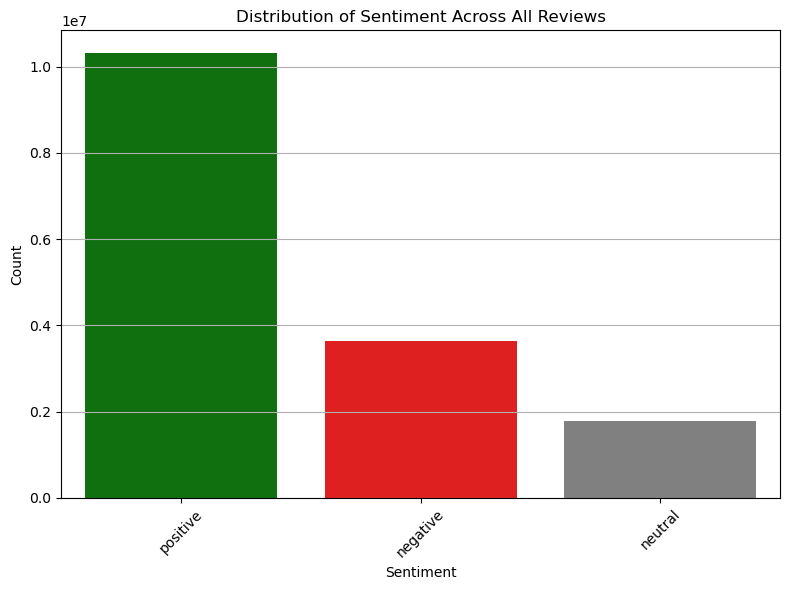

In [58]:
# Count the occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Define a color palette corresponding to the sentiment
color_palette = {
    'positive': 'green',
    'neutral': 'gray',
    'negative': 'red'
}

# Create a bar plot for the sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values,
            palette=[color_palette[sentiment] for sentiment in sentiment_counts.index])

# Set the labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Across All Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


This bar plot illustrates the distribution of sentiment across all reviews. The majority of reviews are classified as positive, followed by a smaller proportion of negative reviews. Neutral reviews represent the lowest frequency. This trend suggests that users tend to express favorable opinions about the games they review, while negative and neutral sentiments are less common.

## Sentiment and recommendation

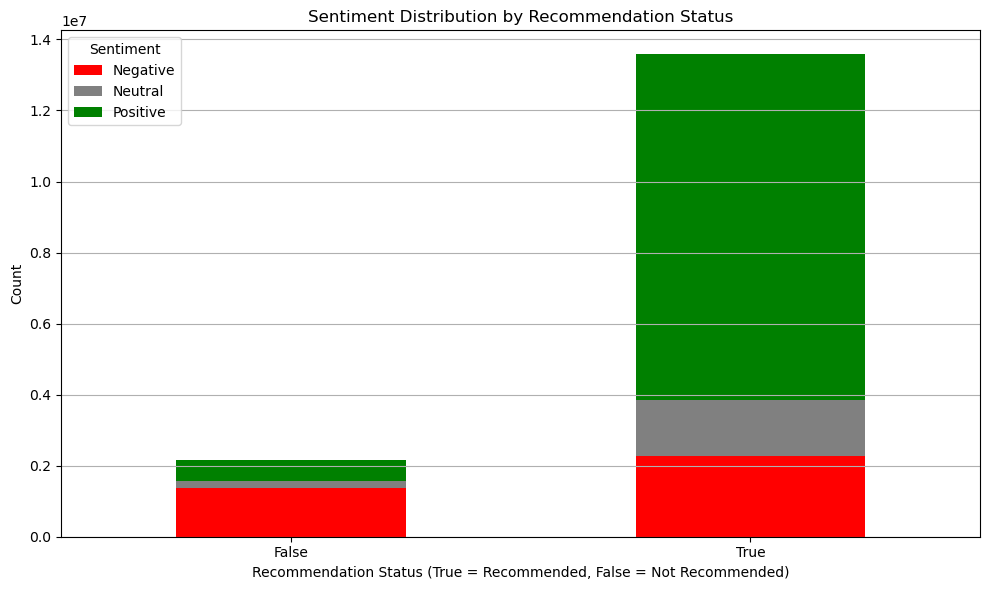

In [59]:
# Count the occurrences of each sentiment for recommended and not recommended
sentiment_recommendation_counts = df.groupby(['recommended', 'sentiment']).size().unstack(fill_value=0)

# Plot the results
sentiment_recommendation_counts.plot(kind='bar', stacked=True, color=['red', 'gray', 'green'], figsize=(10, 6))
plt.title('Sentiment Distribution by Recommendation Status')
plt.xlabel('Recommendation Status (True = Recommended, False = Not Recommended)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

The non recommended reviews are almost all classified as negative, whilst a good portion of the recommended ones are positive, thus the sentiment analysis aligns quite well with whether the application is recommended.
This trend is expected, and suggests that the sentiment analysis has performed well.

## Correlation between sentiment and helpfulness

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_16448\677970268.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_votes_by_sentiment, x='sentiment', y='votes_helpful', palette=['red', 'gray', 'green'])


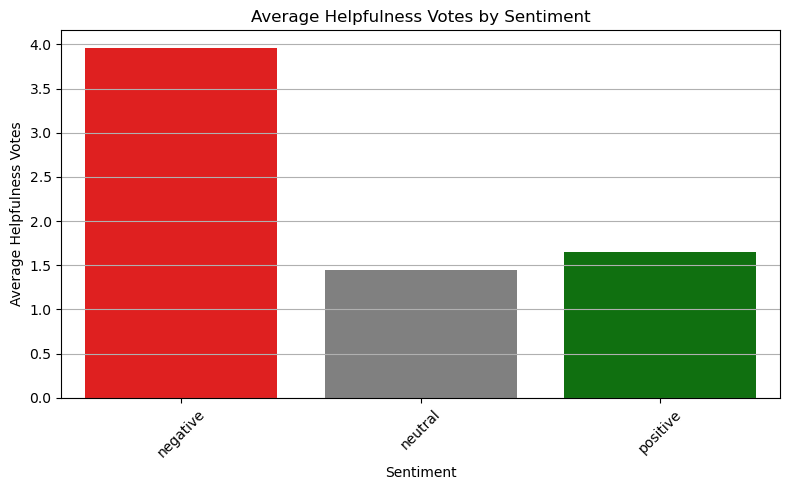

In [60]:
# Filter values that are not realistic
df = df[df['votes_helpful'] <= 30000].copy()

# Calculate average helpfulness votes by sentiment
average_votes_by_sentiment = df.groupby('sentiment')['votes_helpful'].mean().reset_index()

# Visualize the average helpfulness votes by sentiment
plt.figure(figsize=(8, 5))
sns.barplot(data=average_votes_by_sentiment, x='sentiment', y='votes_helpful', palette=['red', 'gray', 'green'])
plt.title('Average Helpfulness Votes by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Helpfulness Votes')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

The plot suggests that on average, negative reviews are more helpful than the positive ones.
This might be due to the fact that when shopping for a game, a negative review can highlight the specific shortcomings or issues that a player experienced, which can be critical for potential buyers to consider before making a purchase.
Negative reviews may serve as warning sfor users to avoid poor choices, making their decision more valuable.
Also, the negativity bias, where consumers pay more attention to negative feedback, is a well-known phenomenon in consumer behavior.

To be sure, let's compute the correlation of the two variables.

In [61]:
# Encode sentiment strings for correlation analysis
sentiment_numerical_mapping = {
    'negative': -1,
    'neutral': 0,
    'positive': 1
}

# Add a new column for numerical representation
df['sentiment_numeric'] = df['sentiment'].map(sentiment_numerical_mapping)

# Calculate the correlation between sentiment and helpfulness votes
correlation = df['sentiment_numeric'].corr(df['votes_helpful'])
print(f"Correlation between sentiment and helpfulness votes: {correlation:.2f}")

Correlation between sentiment and helpfulness votes: -0.02


The negative correlation indicates a relationship between negative sentiment and the helpfulness of reviews, although this relationship is weaker than expected.
This may be because correlation only measures the linear relationship between two variables, but there is the possibility of a non-linear relationship between the two variable, that we could study with other techniques. Alternatively, helpfulness votes might increase with negative sentiment due to interactions with other variables not considered in this analysis. In other words, a negative review might receive many helpfulness votes not simply due to its negative sentiment, but also because it possesses additional characteristics not considered in this analysis. A regression model could help to find more information on this latter possibility.

# ALGORITHMIC QUESTION

You are given two positive integers, $𝑛$ (where $1 \leq 𝑛 \leq 109$) and $k$ (where $𝑞 \leq 𝑘 \leq 100$). Your task is to express $𝑛$ as the sum of $𝑘$ positive integers, all having the same parity (i.e., all have the same remainder when divided by $2$, meaning they are either all even or all odd). In other words, find $𝑎_1,𝑎_2, \dots,𝑎_𝑘$ each $𝑎_𝑖>0,𝑛=𝑎_1+𝑎_2+\dots+𝑎_𝑘$, and all $a_i$ simultaneously are either even or odd. If it's impossible to represent 𝑛 in this way, report that no such representation exists. Input In the first input line, you will receive a number $t$ (where $1 \leq 𝑡 \leq 100$), representing the number of test cases. The following 𝑡 lines will contain two values, 𝑛 and 𝑘, corresponding to each test case. Output For each test case, if it is possible to represent 𝑛 as the sum of 𝑘 positive integers, all of the same parity (either all even or all odd), print `YES` and provide the corresponding values of $a_i$ in the next line. If there are multiple valid solutions, you can print any of them. If such a representation is not possible for a given test case, print `NO`.

## Agorithm explanation and code

For every test case, the integer $n$ can either be odd or even.

### First case: $n$ is odd

In this case, to express $n$ as the sum of $k$ integer with same parity, $k$ must be odd.
In fact the sum of an even number of integer with same parity is always even.
So let's assume that also $k$ is odd.
As the minimum positive odd integer is $1$, to express $n$ as wanted we must have:
\begin{equation*}
    n\geq 1\cdot k = k
\end{equation*}
If this last equation is verified, then we can write $n$ as the sum of $k-1$ ones plus the remainder $r = n-k+1$:
\begin{equation*}
    n =  (k-1) + (n-k+1) = 1 \cdot (k-1) + r = 1 + \dots + 1 + r
\end{equation*}
where $r$ is odd and have the same parity as $1$.

### Second case: $n$ is even

If $k$ is even, we can write $n$ as the sum of integers with odd parity, thus as in the previous case it must be:
\begin{equation*}
    n\geq 1\cdot k = k
\end{equation*}
and we can represent $n$ as:
\begin{equation*}
    n =  (k-1) + (n-k+1) = 1 \cdot (k-1) + r = 1 + \dots + 1 + r
\end{equation*}
where $r$ is odd and have the same parity as $1$.

If $k$ instead is odd, then the parity of the $a_i$ must be even, so every $a_i$ is at least $2$, thus must be verified:
\begin{equation*}
    n\geq 2\cdot k = 2k
\end{equation*}
If the last equation is verified, then we can rapresent $n$ as:
\begin{equation*}
    n =  (2k-2) + (n-2k+2) = 2 \cdot (k-1) + r = 2 + \dots + 2 + r
\end{equation*}
where $r=n-2k+2$ is even.

In [62]:
for t in range(int(input())):

    n, k = map(int, input().split())

    # FIRST CASE: n is odd
    if n%2==1:
        # In this case, to represent n as wanted, k must me odd too,
        # since otherwise an even sum of same parity integers would be even.
        # Also, k must be smaller than n.
        if k%2==1 and k<=n:
            print("YES")
            result = ["1"]*(k-1) + [str(n-k+1)]
            print(" ".join(result))
        # Otherwise, no such reperesentation exists.
        else:
            print("NO")

    # SECOND CASE: n is even
    else:
        # If k is even too, then n can be written as a sum of k odd positive integers,
        # thus those integers may as well be ones, allowing n to be as small as k.
        if k%2==0 and k<=n:
            print("YES")
            result = ["1"]*(k-1) + [str(n-k+1)]
            print(" ".join(result))
        # If instead k is odd, then n must be written as a sum of even positive integers.
        # But the smallest one is 2, so to have such a representation n must be bigger than 2k.
        elif k%2==1 and 2*k<=n:
            print("YES")
            result = ["2"]*(k-1) + [str(n-2*k+2)]
            print(" ".join(result))

        else:
            print("NO")

YES
2 2 6
YES
1 1 1 97
NO
NO
YES
1 1 1 1 1 1 1 1
NO
YES
1 1 3


## Time Complexity

For every test case, the worst case scneario (in term of time complexity) is when the answer is YES, in fact when the answer is NO the algorithm knows it in constant time.
When the answer is YES, in every of the three possible scenario, the only non constant time operations are the creation of list of ones or twos (e.g. `["1"]*(k-1)`), the joining of the list as a string and the printing, all with time complexity of $\Theta(k)$.
Thus, if $t$ is the number of test cases and $k^*$ is the maximus $k$ over the test case, then the algorith has time complexity of $O(t\cdot k^*)$.
We get more precise time complexity analysis if we denote with $\bar{k}$ the sum of the $k_j$ for every test case $j$, thus having $O(\bar{k})=O(\sum k_j)$.

## ChatGPT Interaction

I provided ChatGPT with my code and asked to evaluate a computational analysis, answering with markdown code that I can copy paste here.
Its answer, with some minor changes for visualization, is in the following cell.  

### 1. ChatGPT's answer

#### Computational Analysis

The code executes within a loop iterating `t` times, where `t` is provided by the user as input. For each iteration, it performs the following steps:

1. **Input Parsing**:
   - Parsing `n` and `k` takes constant time, $O(1)$.

2. **Conditions and Computations**:
   - For each test case, the code checks whether `n` is odd or even. This is an $O(1)$ operation.
   - It then performs further checks on the parity of `k` and its comparison with `n` to determine if a representation is possible.
   - These conditional checks are $O(1)$ in complexity since they involve only a few comparisons and modulo operations.

3. **Result Construction**:
   - When a solution is found, the code builds a list called `result` using either `1` or `2` as elements, depending on the case. This operation takes $O(k)$ because it creates a list of length `k`.
   - The final call to `" ".join(result)` also takes $O(k)$ since it concatenates `k` elements into a string.

4. **Output Operations**:
   - Printing the results (either "YES", "NO", or the constructed representation) is assumed to take $O(k)$ in the worst case due to string joining and outputting.

#### Overall Complexity

The main operations occur `t` times, and within each iteration, the dominant term in complexity is $O(k)$ due to the list creation and joining operations. Therefore, the total time complexity of the code is:

$$
O(t \cdot k)
$$

This complexity reflects the dependency on the number of test cases `t` and the maximum length of `k` for each test case. Since `k` is dependent on the input size and potentially large in certain cases, this analysis assumes `k` could approach `n`.

In summary:
- **Time Complexity**: $O(t \cdot k)$
- **Space Complexity**: $O(k)$ per iteration for the `result` list.


### 2. Evaluation of ChatGPT's answer

The answer provided is clear, concise and precise.
To be honest, it's probably better than the one I provided above, although the final result of the analysis is almost the same.
The only difference is that I also provided a time complexity based on the sum of the $k_j$, wich gives in general a lower bound on the time complexity.